In [8]:
from IPython.display import HTML, Image

In [1]:
import tensorflow as tf

# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

Hello World!


## Tensor

- In TensorFlow, data isn’t stored as integers, floats, or strings. 
- These values are encapsulated in an object called a tensor. 
- In the case of `hello_constant = tf.constant('Hello World!')`, `hello_constant` is a 0-dimensional string tensor

----
> but tensors come in a variety of sizes as shown below:


In [2]:
# A is a 0-dimensional int32 tensor
A = tf.constant(1234) 
# B is a 1-dimensional int32 tensor
B = tf.constant([ [123,456,789] ]) 
 # C is a 2-dimensional int32 tensor
C = tf.constant([ [123,456,789], [222,333,444] ])

In [3]:
A # only show class and shape

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [4]:
B

<tf.Tensor 'Const_2:0' shape=(1, 3) dtype=int32>

In [5]:
C

<tf.Tensor 'Const_3:0' shape=(2, 3) dtype=int32>

## Constant Tensor
- tf.constant() is one of many TensorFlow operations you will use in this lesson. 
- The tensor returned by tf.constant() is called a constant tensor, because the value of the tensor never changes.


## Session
- TensorFlow’s api is built around the idea of **a computational graph**
- a way of **visualizing a mathematical process**. 

----
> Let’s take the TensorFlow code you ran and turn that into a graph:

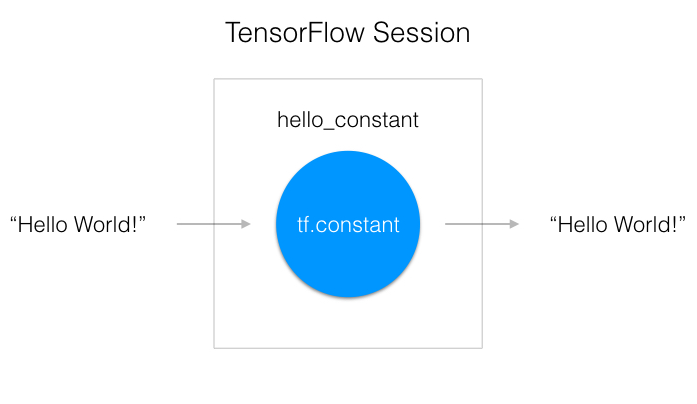

In [7]:
Image('https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580feadb_session/session.png')

## Tensorflow Session
- A "TensorFlow Session", as shown above, is an environment for running a graph. 
- The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines. 


----
> Let’s see how you use it.

```python
with tf.Session() as sess:
    output = sess.run(hello_constant)
```
- The code has already created the tensor, hello_constant, from the previous lines. 
- The next step is to evaluate the tensor in a session.
- The code creates a session instance, `sess`, using `tf.Session`. 
- The `sess.run()` function then evaluates the tensor and returns the results.

## Input
- In the last section, you passed a tensor into a session and it returned the result. 
- What if you want to use a non tensor? Empty tensor? 
- This is where tf.placeholder() and feed_dict come into place. 

----
> In this section, you'll go over the basics of feeding data into TensorFlow.

----
> **tf.placeholder()**
- Sadly you can’t just set x to your dataset and put it in TensorFlow, 
- because over time you'll want your TensorFlow model to take in different datasets with different parameters. 
- You need tf.placeholder()!
- tf.placeholder() returns a tensor that gets its value from data passed to the tf.session.run() function, 
- allowing you to set the input right before the session runs.



## Session’s feed_dict

```python
x = tf.placeholder(tf.string)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello World'})
```
    
> Use the feed_dict parameter in tf.session.run() to set the placeholder tensor. 
- The above example shows the tensor x being set to the string "Hello, world". 

----
> It's also possible to set more than one tensor using feed_dict as shown below.

```python
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Test String', y: 123, z: 45.67})
```    
   
> Note: If the data passed to the feed_dict doesn’t match the tensor type and can’t be cast into the tensor type
- you’ll get the error “ValueError: invalid literal for...”.

In [13]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess: # try to set x, y, z to take each input
    output = sess.run(z, feed_dict={x: 'Test String', y: 123, z: 45.67})

In [14]:
output

array(45.66999816894531, dtype=float32)

In [15]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf


def run():
    output = None
    x = tf.placeholder(tf.int32)

    with tf.Session() as sess:
        # TODO: Feed the x tensor 123
        output = sess.run(x, feed_dict={x:123})

    return output


In [16]:
run()

array(123, dtype=int32)

## Math operations

In [3]:
x = tf.add(5, 2)  # 7
x

<tf.Tensor 'Add:0' shape=() dtype=int32>

In [4]:
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)
x = tf.add(a, b)
y = tf.sub(a, b) # 6
z = tf.mul(a, b)  # 10
w = tf.div(a, b) - 1
with tf.Session() as sess:
    # TODO: Feed the x tensor 123
    output = sess.run(w, feed_dict={a:10, b:2})

In [5]:
output

4

In [2]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

# TODO: Convert the following to TensorFlow:
x = 10
y = 2
z = x/y - 1

# TODO: Print z from a session
with tf.Session() as sess: 
    z = sess.run(tf.div(x,y)-1)
    
z

4

## Train logistic classifier
- logistic regression (isn't the video just talking about linear regression combined with softmax?)
- softmax

In [15]:
HTML('<iframe width="500" height="300" src="https://www.youtube.com/embed/WQsdr1EJgz8?ecver=1" frameborder="0" allowfullscreen></iframe>')

## Linear functions in TensorFlow
> The most common operation in neural networks is calculating the linear combination of inputs, weights, and biases. 

> As a reminder, we can write the output of the linear operation as
![](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58a4d8b3_linear-equation/linear-equation.gif)
> Here, 
- W is a **matrix** of the weights connecting two layers. 
- The output y, the input x, and the biases b are all **vectors**.

## Weights and Bias in TensorFlow
> **The goal of training a neural network is to modify weights and biases to best predict the labels**
- In order to use weights and bias, you'll need a Tensor that can be modified. 
- This leaves out tf.placeholder() and tf.constant(), since those Tensors can't be modified. 
- This is where tf.Variable class comes in.


## tf.Variable()

```python
x = tf.Variable(5)
```

> The tf.Variable class creates a tensor with an initial value that can be modified, much like a normal Python variable. 

> This tensor stores its state in the session, so you must initialize the state of the tensor manually. 

> You'll use the tf.global_variables_initializer() function to initialize the state of all the Variable tensors.

## Initialization

```python
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
```

> The `tf.global_variables_initializer()` call returns an operation that will initialize all TensorFlow variables from the graph. 

> You call the operation using a session to initialize all the variables as shown above. 

> Using the tf.Variable class allows us to change the weights and bias, but an initial value needs to be chosen.

> Initializing the weights with random numbers from a normal distribution is good practice. 

> **Randomizing the weights helps the model from becoming stuck in the same place every time you train it**. 

> You'll learn more about this in the next lesson, when you study gradient descent.

> Similarly, choosing weights from a normal distribution **prevents any one weight from overwhelming other weights**. 

> You'll use the tf.truncated_normal() function to generate random numbers from a normal distribution.


## tf.truncated_normal()
```python

n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))
```

> The tf.truncated_normal() function returns a tensor with random values from **a normal distribution whose magnitude is no more than 2 standard deviations from the mean.

> Since the weights are already helping prevent the model from getting stuck, you don't need to randomize the bias.

> Let's use the simplest solution, setting the bias to 0.


## tf.zeros()
```python
n_labels = 5
bias = tf.Variable(tf.zeros(n_labels))
```

> The tf.zeros() function returns a tensor with all zeros.

## Linear Classifier Quiz

**A subset of the MNIST dataset**

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582cf7a7_mnist-012/mnist-012.png)

> You'll be classifying the handwritten numbers 0, 1, and 2 from the MNIST dataset using TensorFlow. 

> The above is a small sample of the data you'll be training on. 

> Notice how some of the 1s are written with a serif at the top and at different angles. 

> The similarities and differences will play a part in shaping the weights of the model.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582ce9ef_weights-0-1-2/weights-0-1-2.png)

> **The images above are trained weights for each label (0, 1, and 2)**. 

> **The weights display the unique properties of each digit they have found**. 

> Complete this quiz to train your own weights using the MNIST dataset.

## Instructions
- Open quiz.py.
- Implement get_weights to return a tf.Variable of weights
- Implement get_biases to return a tf.Variable of biases
- Implement xW + b in the linear function
- Open sandbox.py
- Initialize all weights

> Since xW in xW + b is matrix multiplication, you have to use the tf.matmul() function instead of tf.mul(). 

> Don't forget that order matters in matrix multiplication, so tf.matmul(a,b) is not the same as tf.matmul(b,a).

In [13]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

In [ ]:
import tensorflow as tf
# Sandbox Solution
# Note: You can't run code in this tab
from tensorflow.examples.tutorials.mnist import input_data

# from quiz import get_weights, get_biases, linear


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))


## Softmax in tensorflow

In [11]:
Image(width=300, height=100, url='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58950908_softmax-input-output/softmax-input-output.png')

In [7]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf


def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)

    softmax = tf.nn.softmax(logits)

    with tf.Session() as sess:
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output

run()

array([ 0.65900117,  0.24243298,  0.09856589], dtype=float32)

## How to do one-hot-encoder for labels

In [6]:
import numpy as np
from sklearn import preprocessing

# Example labels
labels = np.array([1,5,3,2,1,4,2,1,3])

# Create the encoder
lb = preprocessing.LabelBinarizer()

# Here the encoder finds the classes and assigns one-hot vectors 
lb.fit(labels)

# And finally, transform the labels into one-hot encoded vectors
lb.transform(labels)


array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

## Calculating cross-entropy using tensorflow

In [3]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

# ToDo: Print cross entropy from session
cross_entropy = -tf.reduce_sum(tf.mul(one_hot, tf.log(softmax)))

with tf.Session() as sess:
    print(sess.run(cross_entropy, feed_dict={softmax: softmax_data, one_hot: one_hot_data}))


0.356675


## Normalize inputs and initialize weights

In [10]:
HTML('<iframe width="760" height="427" src="https://www.youtube.com/embed/WaHQ9-UXIIg?ecver=1" frameborder="0" allowfullscreen></iframe>')

## Measuring Performance

> How can test data in evaluation sneek into training set? 
- if test set is used for evaluation for how good and how to adjust model based on training set
- over time, the model is trained and adjusted under the guidance of test set
- test set sneek in

> This is why we need valdiation set from training set for evaluation and paramenter tuning

In [9]:
HTML('<iframe width="760" height="427" src="https://www.youtube.com/embed/jmq5hj_CWlM?ecver=1" frameborder="0" allowfullscreen></iframe>')

## Stochastic Gradient Descent

> to calc the gradient based on all data points at once is very inefficient and expensive to do

> must randomize subset of data

> each update or gradient calced from each batch would be bad, but over many iterations, it is efficient and good enough

In [8]:
HTML('<iframe width="500" height="300" src="https://www.youtube.com/embed/hMLUgM6kTp8?ecver=1" frameborder="0" allowfullscreen></iframe>')

## Momentum and Learning decay

> **Don't understand Momentum at all**

> learning_decay: to reduce learning rate as it approaches to optimal

In [7]:
HTML('<iframe width="500" height="300" src="https://www.youtube.com/embed/O3QYdmQjXds?ecver=1" frameborder="0" allowfullscreen></iframe>')

## Parameter Hyperspace

- how fast and how well you learn
- always lower your learning rate first 
- ADAGRAD: make things easier, automatically do inital learning rate, learning rate decay, momentum

In [6]:
HTML('<iframe width="500" height="300" src="https://www.youtube.com/embed/5a3-iIhdguc?ecver=1" frameborder="0" allowfullscreen></iframe>')

## Mini-batching
> In this section, you'll go over what mini-batching is and how to apply it in TensorFlow.

> Mini-batching is a technique for training on subsets of the dataset instead of all the data at one time. 

> This provides the ability to train a model, even if a computer **lacks the memory to store the entire dataset**.

> Mini-batching is computationally inefficient, since you can't calculate the loss simultaneously across all samples. 

> However, this is a small price to pay in order to be able to run the model at all.

> It's also quite useful combined with SGD. The idea is to randomly shuffle the data at the start of each epoch, then create the mini-batches. 

> For each mini-batch, you train the network weights with gradient descent. 

> Since these batches are random, you're performing SGD with each batch.

> Let's look at the MNIST dataset with weights and a bias to see if your machine can handle it.

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

# make features and labels same type
train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# create Weights & bias placeholders, matrix and vector
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

Question 1
Calculate the memory size of train_features, train_labels, weights, and bias in bytes. Ignore memory for overhead, just calculate the memory required for the stored data.

You may have to look up how much memory a float32 requires, using this link.

train_features Shape: (55000, 784) Type: float32

train_labels Shape: (55000, 10) Type: float32

weights Shape: (784, 10) Type: float32

bias Shape: (10,) Type: float32

## TensorFlow Mini-batching
> In order to use mini-batching, you must first divide your data into batches.

> Unfortunately, it's sometimes impossible to divide the data into batches of exactly equal size. 

> For example, imagine you'd like to create batches of 128 samples each from a dataset of 1000 samples. 

> Since 128 does not evenly divide into 1000, you'd wind up with 7 batches of 128 samples, and 1 batch of 104 samples. (7*128 + 1*104 = 1000)

> In that case, the size of the batches would vary, so you need to take advantage of TensorFlow's tf.placeholder() function to receive the varying batch sizes.

> Continuing the example, if each sample had n_input = 784 features and n_classes = 10 possible labels, the dimensions for features would be [None, n_input] and labels would be [None, n_classes].

In [ ]:
# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])


> What does None do here?

> The None dimension is a placeholder for the batch size. At runtime, TensorFlow will accept any batch size greater than 0.

> Going back to our earlier example, this setup allows you to feed features and labels into the model as either the batches of 128 samples or the single batch of 104 samples.

> Question 2 : Use the parameters below, how many batches are there, and what is the last batch size?
- features is (50000, 400)
- labels is (50000, 10)
- batch_size is 128

### Helper function for creating batches

In [1]:
import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    # TODO: Implement batching
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches


In [3]:
# from quiz import batches
from pprint import pprint

# 4 Samples of features
example_features = [
    ['F11','F12','F13','F14'],
    ['F21','F22','F23','F24'],
    ['F31','F32','F33','F34'],
    ['F41','F42','F43','F44']]
# 4 Samples of labels
example_labels = [
    ['L11','L12'],
    ['L21','L22'],
    ['L31','L32'],
    ['L41','L42']]

# PPrint prints data structures like 2d arrays, so they are easier to read
pprint(batches(3, example_features, example_labels))


[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]


## Epochs
> An epoch is a single forward and backward pass of the whole dataset. 

> This is used to increase the accuracy of the model without requiring more data. 

> This section will cover epochs in TensorFlow and how to choose the right number of epochs.

> The following TensorFlow code trains a model using 10 epochs.

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
from helper import batches  # Helper function created in Mini-batching section


def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        cost,
        feed_dict={features: last_features, labels: last_labels})
    
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: valid_features, labels: valid_labels})
    
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(  # try it out to find out the usage
        epoch_i,
        current_cost,
        valid_accuracy))

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
valid_features = mnist.validation.images
test_features = mnist.test.images

# make sure they are in the same type
train_labels = mnist.train.labels.astype(np.float32)
valid_labels = mnist.validation.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels: create variable to contain matrix, without constraint on number of examples
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias: this is a NN without hidden layer, just from input layer to output layer
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits = xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
learning_rate = tf.placeholder(tf.float32)

# create placeholder for cost 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))

# create place holder for updated amount of weights and biases
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

batch_size = 128
epochs = 10
learn_rate = 0.001

# create batches using helper function 
train_batches = batches(batch_size, train_features, train_labels)

with tf.Session() as sess:
    
    # must init first
    sess.run(init)

    # Training cycle for each epoch
    for epoch_i in range(epochs):

        # Loop over all batches
        for batch_features, batch_labels in train_batches:
            
            # in each batch, calc updated amount of weights and biases
            train_feed_dict = {
                features: batch_features,
                labels: batch_labels,
                learning_rate: learn_rate}
            sess.run(optimizer, feed_dict=train_feed_dict)

        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_labels)

    # After training, Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

Running the code will output the following:

Epoch: 0    - Cost: 11.0     Valid Accuracy: 0.204
Epoch: 1    - Cost: 9.95     Valid Accuracy: 0.229
Epoch: 2    - Cost: 9.18     Valid Accuracy: 0.246
Epoch: 3    - Cost: 8.59     Valid Accuracy: 0.264
Epoch: 4    - Cost: 8.13     Valid Accuracy: 0.283
Epoch: 5    - Cost: 7.77     Valid Accuracy: 0.301
Epoch: 6    - Cost: 7.47     Valid Accuracy: 0.316
Epoch: 7    - Cost: 7.2      Valid Accuracy: 0.328
Epoch: 8    - Cost: 6.96     Valid Accuracy: 0.342
Epoch: 9    - Cost: 6.73     Valid Accuracy: 0.36 
Test Accuracy: 0.3801000118255615

> Each epoch attempts to move to a lower cost, leading to better accuracy.

> This model continues to improve accuracy up to Epoch 9. Let's increase the number of epochs to 100.

...
Epoch: 79   - Cost: 0.111    Valid Accuracy: 0.86
Epoch: 80   - Cost: 0.11     Valid Accuracy: 0.869
Epoch: 81   - Cost: 0.109    Valid Accuracy: 0.869
....
Epoch: 85   - Cost: 0.107    Valid Accuracy: 0.869
Epoch: 86   - Cost: 0.107    Valid Accuracy: 0.869
Epoch: 87   - Cost: 0.106    Valid Accuracy: 0.869
Epoch: 88   - Cost: 0.106    Valid Accuracy: 0.869
Epoch: 89   - Cost: 0.105    Valid Accuracy: 0.869
Epoch: 90   - Cost: 0.105    Valid Accuracy: 0.869
Epoch: 91   - Cost: 0.104    Valid Accuracy: 0.869
Epoch: 92   - Cost: 0.103    Valid Accuracy: 0.869
Epoch: 93   - Cost: 0.103    Valid Accuracy: 0.869
Epoch: 94   - Cost: 0.102    Valid Accuracy: 0.869
Epoch: 95   - Cost: 0.102    Valid Accuracy: 0.869
Epoch: 96   - Cost: 0.101    Valid Accuracy: 0.869
Epoch: 97   - Cost: 0.101    Valid Accuracy: 0.869
Epoch: 98   - Cost: 0.1      Valid Accuracy: 0.869
Epoch: 99   - Cost: 0.1      Valid Accuracy: 0.869
Test Accuracy: 0.8696000006198883

> From looking at the output above, you can see the model doesn't increase the validation accuracy after epoch 80. 

> Let's see what happens when we increase the learning rate.

learn_rate = 0.1

Epoch: 76   - Cost: 0.214    Valid Accuracy: 0.752
Epoch: 77   - Cost: 0.21     Valid Accuracy: 0.756
Epoch: 78   - Cost: 0.21     Valid Accuracy: 0.756
...
Epoch: 85   - Cost: 0.207    Valid Accuracy: 0.756
Epoch: 86   - Cost: 0.209    Valid Accuracy: 0.756
Epoch: 87   - Cost: 0.205    Valid Accuracy: 0.756
Epoch: 88   - Cost: 0.208    Valid Accuracy: 0.756
Epoch: 89   - Cost: 0.205    Valid Accuracy: 0.756
Epoch: 90   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 91   - Cost: 0.207    Valid Accuracy: 0.756
Epoch: 92   - Cost: 0.204    Valid Accuracy: 0.756
Epoch: 93   - Cost: 0.206    Valid Accuracy: 0.756
Epoch: 94   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 95   - Cost: 0.2974   Valid Accuracy: 0.756
Epoch: 96   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 97   - Cost: 0.2996   Valid Accuracy: 0.756
Epoch: 98   - Cost: 0.203    Valid Accuracy: 0.756
Epoch: 99   - Cost: 0.2987   Valid Accuracy: 0.756
Test Accuracy: 0.7556000053882599

> Looks like the learning rate was increased too much. 

> The final accuracy was lower, and it stopped improving earlier. 

> Let's stick with the previous learning rate, but change the number of epochs to 80.

Epoch: 65   - Cost: 0.122    Valid Accuracy: 0.868
Epoch: 66   - Cost: 0.121    Valid Accuracy: 0.868
Epoch: 67   - Cost: 0.12     Valid Accuracy: 0.868
Epoch: 68   - Cost: 0.119    Valid Accuracy: 0.868
Epoch: 69   - Cost: 0.118    Valid Accuracy: 0.868
Epoch: 70   - Cost: 0.118    Valid Accuracy: 0.868
Epoch: 71   - Cost: 0.117    Valid Accuracy: 0.868
Epoch: 72   - Cost: 0.116    Valid Accuracy: 0.868
Epoch: 73   - Cost: 0.115    Valid Accuracy: 0.868
Epoch: 74   - Cost: 0.115    Valid Accuracy: 0.868
Epoch: 75   - Cost: 0.114    Valid Accuracy: 0.868
Epoch: 76   - Cost: 0.113    Valid Accuracy: 0.868
Epoch: 77   - Cost: 0.113    Valid Accuracy: 0.868
Epoch: 78   - Cost: 0.112    Valid Accuracy: 0.868
Epoch: 79   - Cost: 0.111    Valid Accuracy: 0.868
Epoch: 80   - Cost: 0.111    Valid Accuracy: 0.869
Test Accuracy: 0.86909999418258667

> The accuracy only reached 0.86, but that could be because the learning rate was too high. 

> Lowering the learning rate would require more epochs, but could ultimately achieve better accuracy.

> In the upcoming TensorFLow Lab, you'll get the opportunity to choose your own learning rate, epoch count, and batch size to improve the model's accuracy.